In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df = df.loc[df['Quantity'] > 0]

In [4]:
df = df.dropna(subset=['CustomerID'])

In [12]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Tiền xử lý dữ liệu
df.dropna(subset=['Description'], inplace=True)  # Bỏ các dòng có mô tả bị thiếu
df.drop_duplicates(subset=['StockCode', 'Description'], inplace=True)  # Bỏ các sản phẩm trùng lặp

# Đặt lại chỉ mục sau khi bỏ các dòng
df.reset_index(drop=True, inplace=True)

# Vector hóa các mô tả sản phẩm bằng TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Description'])  # Chuyển đổi cột 'Description' thành ma trận TF-IDF

# Tính toán độ tương đồng cosine giữa các sản phẩm
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  # Tính toán độ tương đồng cosine



In [13]:
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
print('Kích thước ma trận tương đồng:', cosine_sim.shape)
print(cosine_sim)

Kích thước ma trận tương đồng: (3897, 3897)
[[1.         0.2167463  0.         ... 0.         0.76851615 0.        ]
 [0.2167463  1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.18842463 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.76851615 0.         0.18842463 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


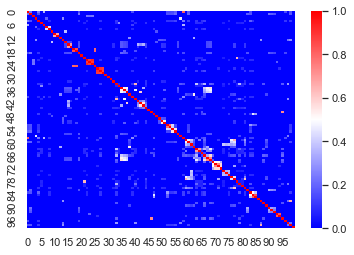

In [14]:
#Trực quan hóa độ tương đồng của 100 sản phẩm đầu tiên với nhau:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cosine_sim[0:100,0:100],
                 cmap='bwr' )
plt.show()

In [ ]:
# Hàm để lấy gợi ý sản phẩm
def get_recommendations(stock_code, cosine_sim=cosine_sim):
    # Lấy chỉ mục của sản phẩm khớp với mã sản phẩm
    idx = df[df['StockCode'] == stock_code].index[0]

    # Lấy điểm độ tương đồng từng cặp của tất cả các sản phẩm với sản phẩm đó
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sắp xếp các sản phẩm dựa trên điểm độ tương đồng
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Lấy điểm của 10 sản phẩm tương tự nhất
    sim_scores = sim_scores[1:11]

    # Lấy chỉ mục của các sản phẩm
    item_indices = [i[0] for i in sim_scores]

    # Trả về 10 sản phẩm tương tự nhất
    return df[['StockCode', 'Description']].iloc[item_indices]

# Ví dụ sử dụng
stock_code = '85123A'  # Ví dụ về mã sản phẩm
recommendations = get_recommendations(stock_code)  # Lấy gợi ý
print(recommendations)  # In ra các gợi ý